In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
!pip install umap-learn
import umap

In [7]:
# Load the dataset
data = pd.read_csv('/content/Credit Card Customer Data.csv')
data.head()
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [8]:
# Preprocessing: Dropping identifier columns
data_reduced = data.drop(['Sl_No', 'Customer Key'], axis=1)

In [9]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_reduced)

In [10]:
# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

In [11]:
# SVD
svd = TruncatedSVD(n_components=3)
svd_result = svd.fit_transform(scaled_data)

In [12]:
# MDS
mds = MDS(n_components=3, random_state=0)
mds_result = mds.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [13]:
# ISOMap
isomap = Isomap(n_components=3)
isomap_result = isomap.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [14]:
# LLE
lle = LocallyLinearEmbedding(n_components=3)
lle_result = lle.fit_transform(scaled_data)

In [16]:
import umap.umap_ as umap

# UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)
umap_result = umap_model.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [17]:
# t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(scaled_data[:500, :])  # Using a subset for t-SNE

In [18]:
# Visualization functions
def plot_2d(data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
    plt.title(title)
    plt.xlabel(title + ' Component 1')
    plt.ylabel(title + ' Component 2')
    plt.grid(True)
    plt.show()

In [19]:
def plot_3d(data, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.7)
    ax.set_title(title + " 3D Result")
    ax.set_xlabel(title + " Component 1")
    ax.set_ylabel(title + " Component 2")
    ax.set_zlabel(title + " Component 3")
    plt.show()

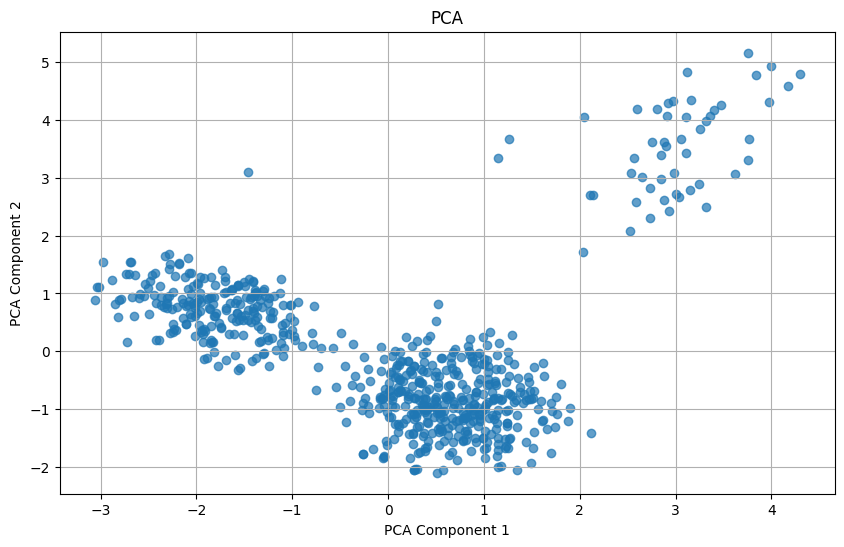

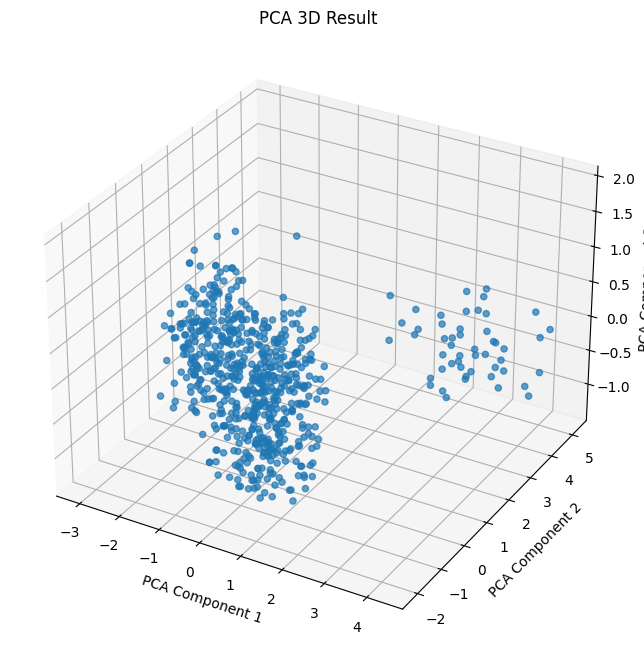

In [20]:
# Plotting 2D and 3D visualizations
plot_2d(pca_result[:, :2], "PCA")
plot_3d(pca_result, "PCA")

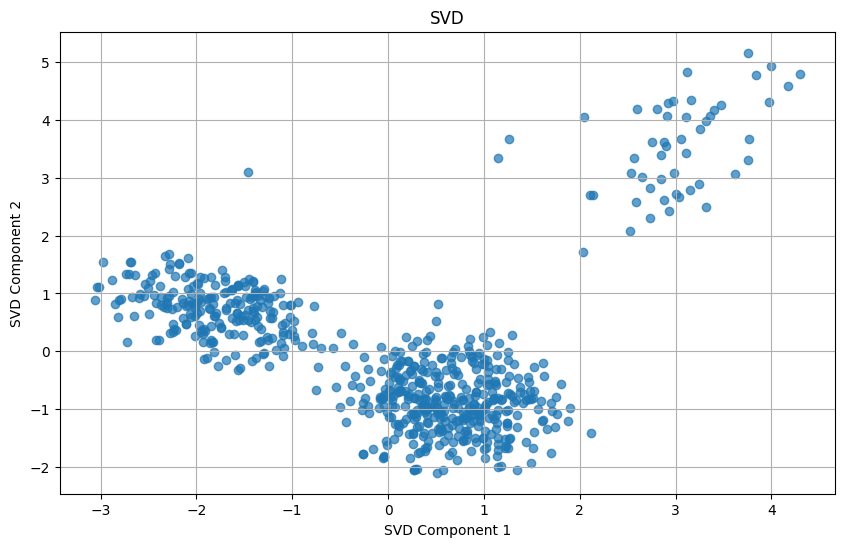

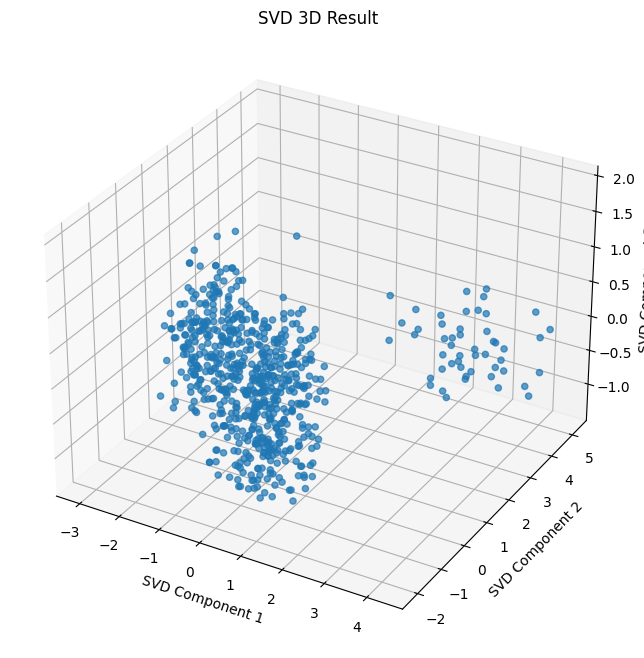

In [21]:
plot_2d(svd_result[:, :2], "SVD")
plot_3d(svd_result, "SVD")

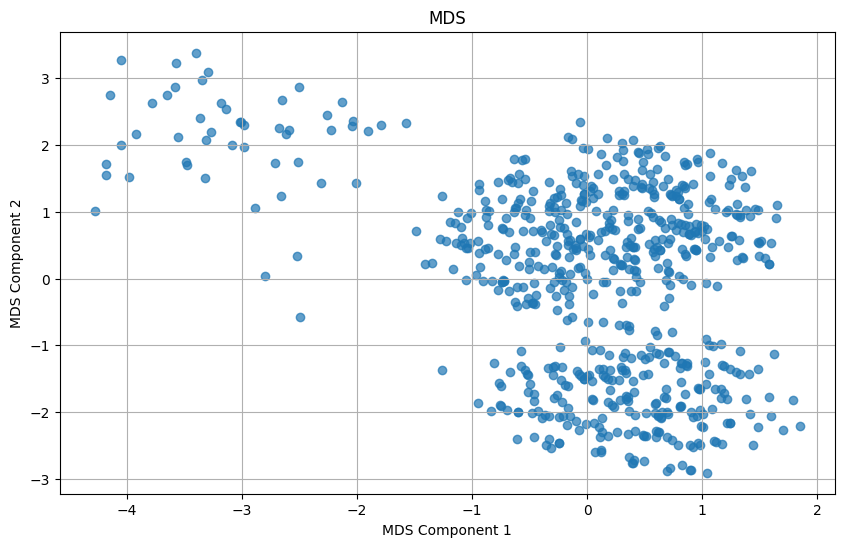

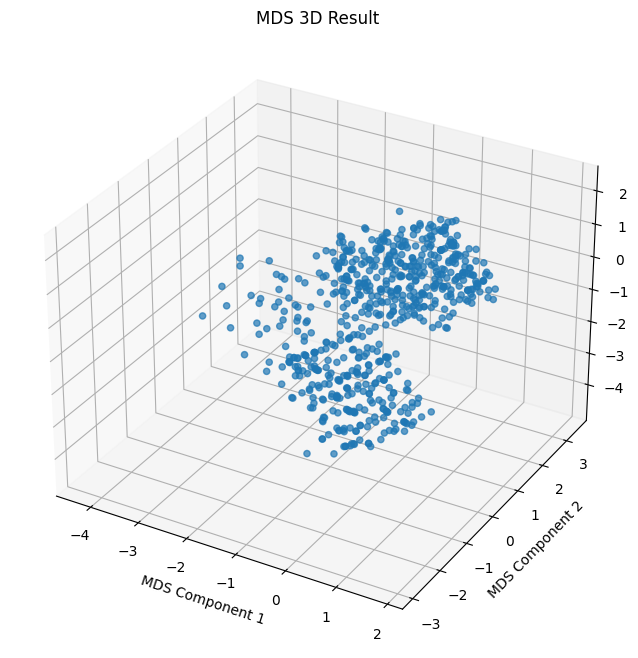

In [22]:
plot_2d(mds_result[:, :2], "MDS")
plot_3d(mds_result, "MDS")

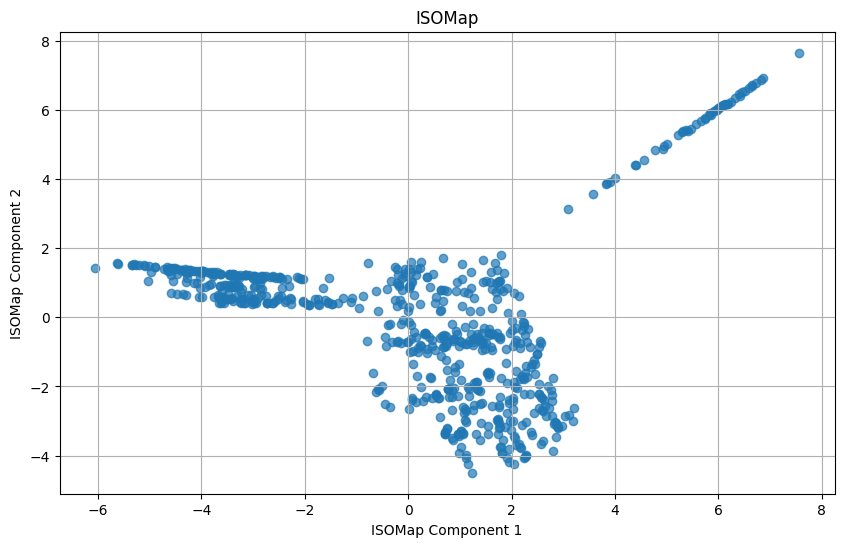

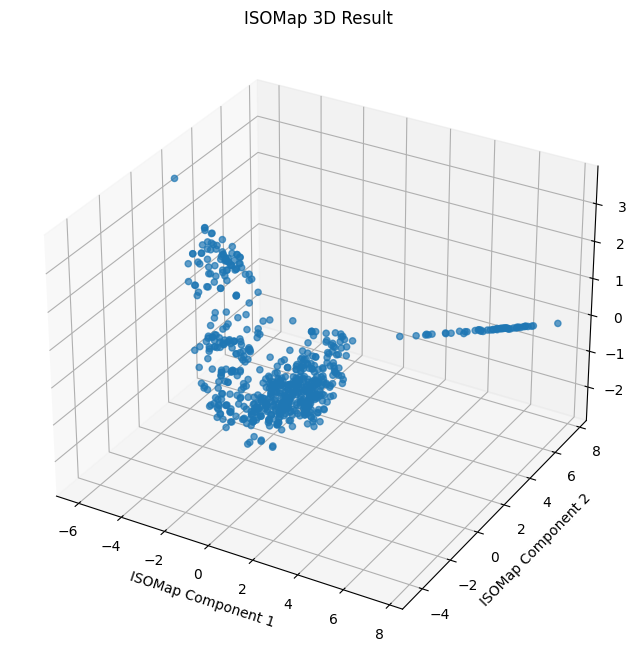

In [23]:
plot_2d(isomap_result[:, :2], "ISOMap")
plot_3d(isomap_result, "ISOMap")

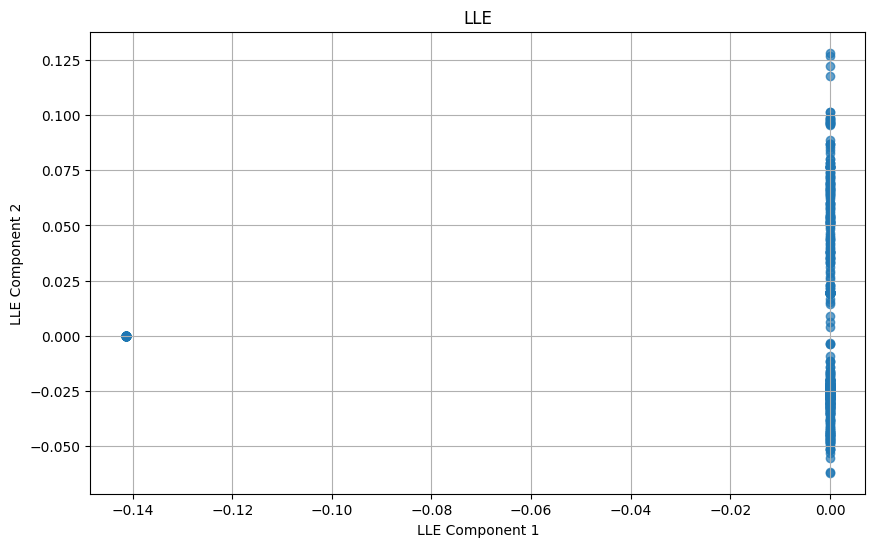

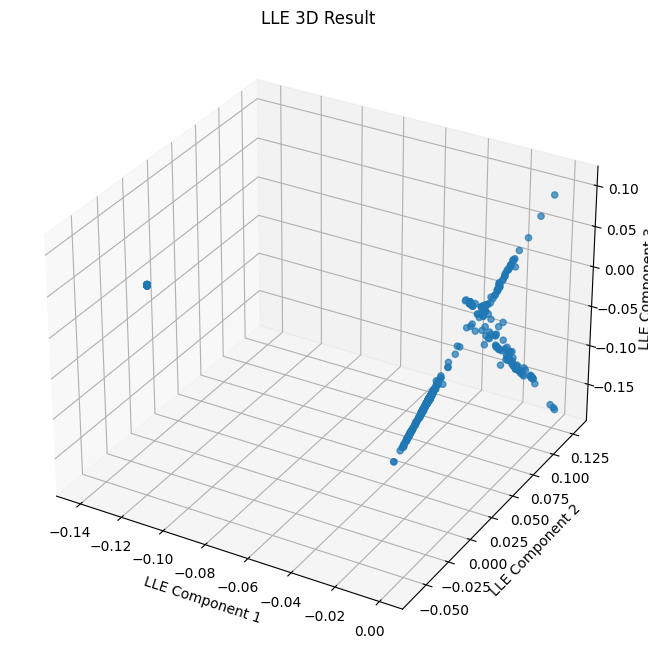

In [24]:
plot_2d(lle_result[:, :2], "LLE")
plot_3d(lle_result, "LLE")

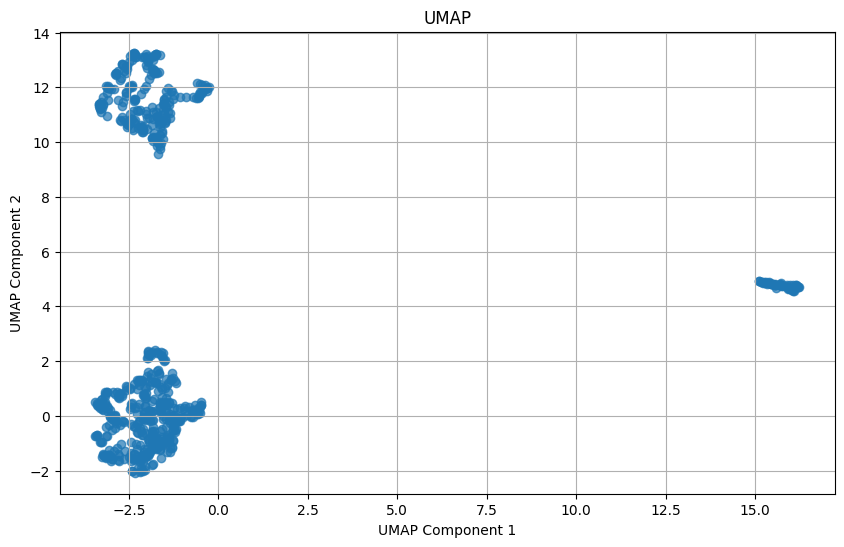

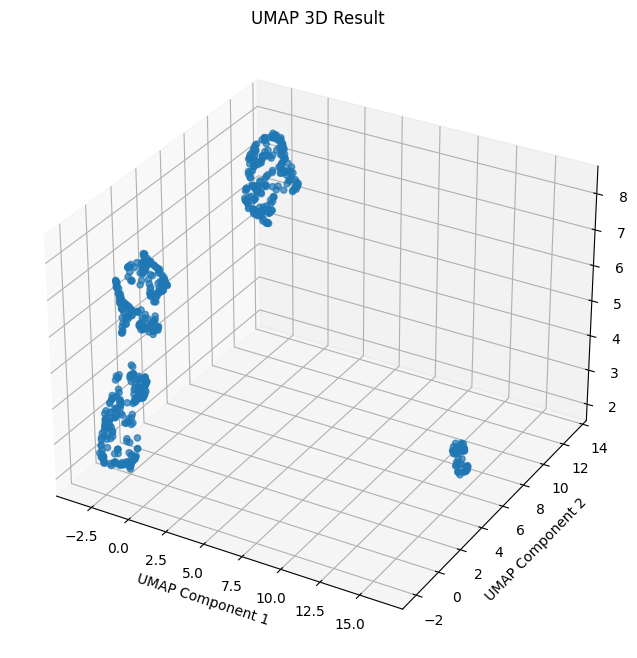

In [25]:
plot_2d(umap_result[:, :2], "UMAP")
plot_3d(umap_result, "UMAP")

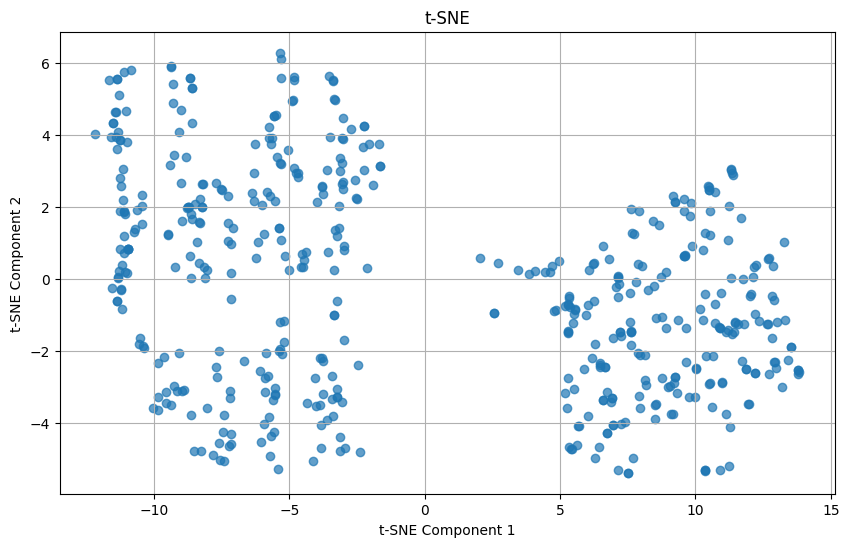

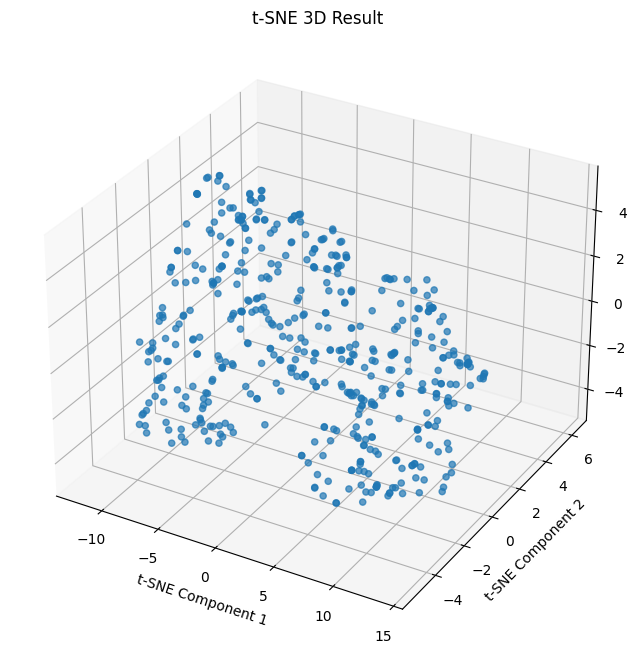

In [26]:
plot_2d(tsne_result[:, :2], "t-SNE")
plot_3d(tsne_result, "t-SNE")